### Install Dependency

In [ ]:
%pip install -q matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math

np.random.seed(1234)

## Helper Function

### Random Board Function

In [ ]:
def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

### Conflicts Board Function

In [ ]:
def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

### Show Board Function

In [ ]:
# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

Board with 4 conflicts.


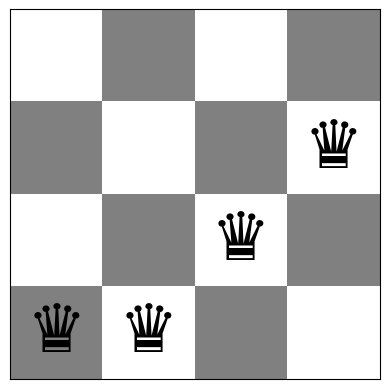

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [ ]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

### Objective and Generate Neighbors Function

In [ ]:
import random

# objective of the problem (find the highest value = 0)
def objective(board):
  return -conflicts(board)

def generate_neighbors(board):
  n = len(board)
  neighbors = []
  for col in range(n):
    for row in range(n):
      if board[col] != row:
        new_board = board[:]
        new_board[col] = row
        neighbors.append(new_board)

  return neighbors


## Algorithm

### Steepest-ascend Hill Climbing

Board with 0 conflicts.


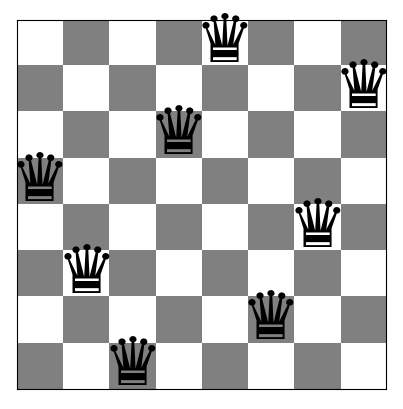

Queens (left to right) are at rows: [3, 5, 7, 2, 0, 6, 4, 1]
Number of conflicts: 0


In [ ]:
def steepest_ascend_hill_climbing(n, max_iter=1000):

  current = [random.randint(0, n-1) for _ in range(n)]

  for _ in range(max_iter):
    current_objective = objective(current)
    neighbors = generate_neighbors(current)

    best_neighbors = max(neighbors, key=objective)
    best_objective = objective(best_neighbors)

    if best_objective <= current_objective:
      return current

    current = best_neighbors

  return current


solution = steepest_ascend_hill_climbing(8)

show_board(solution)
print(f"Queens (left to right) are at rows: {solution}")
print(f"Number of conflicts: {conflicts(solution)}")

### Stochastic Hill Climbing

Board with 1 conflicts.


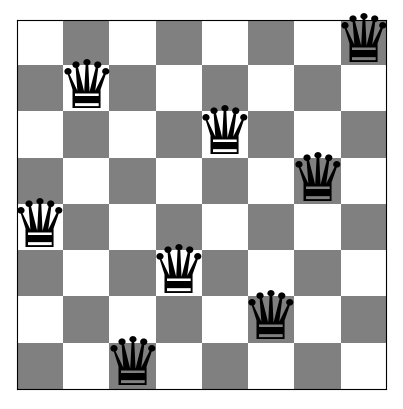

Queens (left to right) are at rows: [4, 1, 7, 5, 2, 6, 3, 0]
Number of conflicts: 1


In [ ]:
def stochastic_hill_climbing(n, max_iter=100):

  current = [random.randint(0, n-1) for _ in range(n)]

  for _ in range(max_iter):
    current_objective = objective(current)
    neighbors = generate_neighbors(current)

    best_neighbor = random.choice(neighbors)
    best_objective = objective(best_neighbor)

    if best_objective > current_objective:
      current = best_neighbor

  return current

solution = stochastic_hill_climbing(8)

show_board(solution)
print(f"Queens (left to right) are at rows: {solution}")
print(f"Number of conflicts: {conflicts(solution)}")


### First Hill Climbing

Board with 2 conflicts.


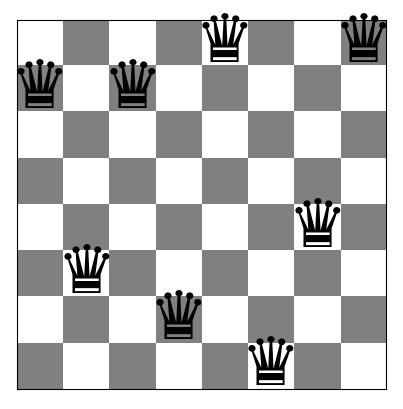

Queens (left to right) are at rows: [1, 5, 1, 6, 0, 7, 4, 0]
Number of conflicts: 2


In [ ]:
def first_choice_hill_climbing(n, max_iter=100):

  current = [random.randint(0, n-1) for _ in range(n)]

  for _ in range(max_iter):
    current_objective = objective(current)
    neighbors = generate_neighbors(current)
    random.shuffle(neighbors)

    for neighbor in neighbors:
      neighbor_objective = objective(neighbor)
      if neighbor_objective > current_objective:
        current = neighbor
        break

  return current

solution = first_hill_climbing(8)

show_board(solution)
print(f"Queens (left to right) are at rows: {solution}")
print(f"Number of conflicts: {conflicts(solution)}")


## Random Restarts

In [ ]:
def random_restart(hill_climb_func, n, restarts=100, max_iter=100):
  best_solution = None
  best_score = float("-inf")


  for i in range(restarts):
    solution = hill_climb_func(n, max_iter)
    score = objective(solution)

    print(f"Restart {i+1}: score = {score}")

    if score > best_score:
      best_solution = solution
      best_score = score
      print(f"  -> New best! Score = {best_score}")

    if best_score == 0:
      print("  -> Found perfect solution, stopping early!")
      break

  return best_solution

### Steepest with random restart

Restart 1: score = 0
  -> New best! Score = 0
  -> Found perfect solution, stopping early!
Board with 0 conflicts.


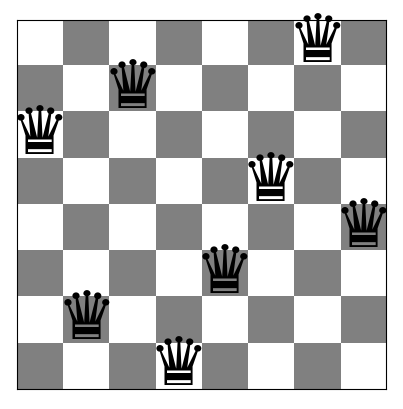

Best solution (Steepest): [2, 6, 1, 7, 5, 3, 0, 4]
Conflicts: 0


In [ ]:
# run steepest with random restart
solution = random_restart(steepest_ascend_hill_climbing, 8, restarts=100)
show_board(solution)
print(f"Best solution (Steepest): {solution}")
print(f"Conflicts: {conflicts(solution)}")

### Stochastic with random restart

Restart 1: score = -3
  -> New best! Score = -3
Restart 2: score = -2
  -> New best! Score = -2
Restart 3: score = 0
  -> New best! Score = 0
  -> Found perfect solution, stopping early!
Board with 0 conflicts.


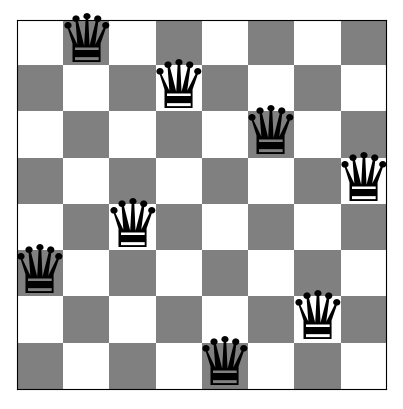

Best solution (Stochastic): [5, 0, 4, 1, 7, 2, 6, 3]
Conflicts: 0


In [ ]:
# run stochastic with random restart
solution = random_restart(stochastic_hill_climbing, 8, restarts=100)
show_board(solution)
print(f"Best solution (Stochastic): {solution}")
print(f"Conflicts: {conflicts(solution)}")

### First-choice with random restart

Restart 1: score = -2
  -> New best! Score = -2
Restart 2: score = -2
Restart 3: score = -1
  -> New best! Score = -1
Restart 4: score = -1
Restart 5: score = -1
Restart 6: score = 0
  -> New best! Score = 0
  -> Found perfect solution, stopping early!
Board with 0 conflicts.


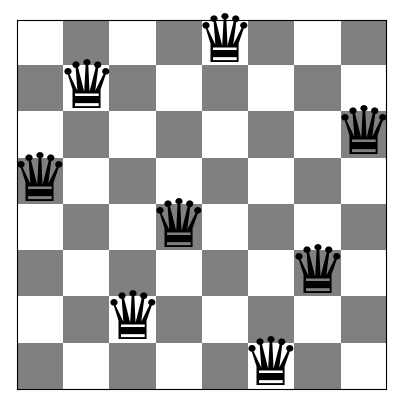

Best solution (First-choice): [3, 1, 6, 4, 0, 7, 5, 2]
Conflicts: 0


In [ ]:
# run first-choice with random restart
solution = random_restart(first_choice_hill_climbing, 8, restarts=100)
show_board(solution)
print(f"Best solution (First-choice): {solution}")
print(f"Conflicts: {conflicts(solution)}")


## Simulated Annealing

### Simple task of Simulated Annealing



In [ ]:
import random

numbers = [1, 2, 3, 4, 5, 6]
f_values = [5, 2, 9, 4, 7, 6]

# Objective: find largest number of f(x) values
def objective(x):
  index = numbers.index(x)
  return f_values[index]

def generate_neighbors(x):
  idx = numbers.index(x)
  choices = []
  if idx > 0:
    choices.append(numbers[idx - 1])
  if idx < len(numbers) - 1:
    choices.append(numbers[idx + 1])
  return random.choice(choices)


def simple_simulated_annealing(tolerance=8, max_iter=20, initial_temperature=5, cooling_rate=0.8):
  current = random.choice(numbers)
  current_value = objective(current)
  temperature = initial_temperature

  print(f"Start: x={current}, f(x)={current_value}")

  for i in range(max_iter):
    neighbor = generate_neighbors(current)
    neighbor_value = objective(neighbor)

    delta = neighbor_value - current_value

    if delta > 0:
      current = neighbor
      current_value = neighbor_value
    else:
      # Probabilitas menerima solusi lebih buruk
      p = math.exp(delta / temperature)
      if random.random() < p:
          current = neighbor
          current_value = neighbor_value

    temperature *= cooling_rate

    if current_value >= tolerance:
      break

  return current, current_value


solution = simple_simulated_annealing()
print(f"Solution: {solution}")

Start: x=5, f(x)=7
Solution: (3, 9)


In [ ]:
import math, random

def objective(x):
  return math.pow(x, 2)

def generate_neighbors(x):
  return x + random.uniform(-1, 1)

def simple_simulated_annealing(tolerance=1, max_iter=10, initial_temperature=10, cooling_rate=0.95):

  current = random.randint(-10, 10)
  current_cost = objective(current)
  temperature = initial_temperature


  for _ in range(max_iter):
    neighbor = generate_neighbors(current)
    neighbor_cost = objective(neighbor)

    delta = neighbor_cost - current_cost

    if delta < 0:
      current = neighbor
      current_cost = neighbor_cost
    else:
      p = math.exp(-delta / temperature)
      if random.random() < p:
        current = neighbor
        current_cost = neighbor_cost

    temperature *= cooling_rate

    if current_cost < tolerance:
      break

    print(f"T={temperature:.4f}, cost={current_cost}, delta={delta}, accepted={current == neighbor}")

  return current, current_cost


x, cost = simple_simulated_annealing()
print(f"best solution: x={x}, cost={cost}")
print(f"Compare solution: {x**2}")

T=9.5000, cost=14.115091950167532, delta=-1.8849080498324682, accepted=True
T=9.0250, cost=20.08890044843741, delta=5.973808498269879, accepted=True
T=8.5738, cost=18.117669767666047, delta=-1.971230680771363, accepted=True
T=8.1451, cost=15.225273833465193, delta=-2.892395934200854, accepted=True
T=7.7378, cost=11.11508482196637, delta=-4.110189011498823, accepted=True
T=7.3509, cost=8.033477081761486, delta=-3.081607740204884, accepted=True
T=6.9834, cost=6.958007921493914, delta=-1.0754691602675717, accepted=True
T=6.6342, cost=5.1855279646616115, delta=-1.7724799568323029, accepted=True
T=6.3025, cost=2.1345204132126714, delta=-3.05100755144894, accepted=True
best solution: x=0.9266605555217049, cost=0.8586997851597947
Compare solution: 0.8586997851597947


### Implementation Simulated Annealing

T=99.0000, cost=6, delta=1, accepted=True
T=98.0100, cost=9, delta=3, accepted=True
T=97.0299, cost=6, delta=-3, accepted=True
T=96.0596, cost=8, delta=2, accepted=True
T=95.0990, cost=8, delta=0, accepted=True
T=94.1480, cost=10, delta=2, accepted=True
T=93.2065, cost=9, delta=-1, accepted=True
T=92.2745, cost=7, delta=-2, accepted=True
T=91.3517, cost=6, delta=-1, accepted=True
T=90.4382, cost=4, delta=-2, accepted=True
T=89.5338, cost=4, delta=0, accepted=True
T=88.6385, cost=5, delta=1, accepted=True
T=87.7521, cost=5, delta=0, accepted=True
T=86.8746, cost=7, delta=2, accepted=True
T=86.0058, cost=6, delta=-1, accepted=True
T=85.1458, cost=7, delta=1, accepted=True
T=84.2943, cost=10, delta=3, accepted=True
T=83.4514, cost=8, delta=-2, accepted=True
T=82.6169, cost=6, delta=-2, accepted=True
T=81.7907, cost=8, delta=2, accepted=True
T=80.9728, cost=6, delta=-2, accepted=True
T=80.1631, cost=4, delta=-2, accepted=True
T=79.3614, cost=1, delta=-3, accepted=True
T=78.5678, cost=2, de

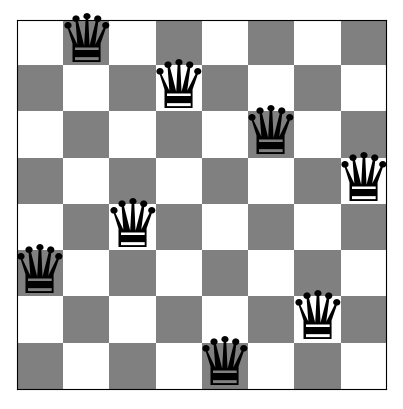

Queens (left to right) are at rows: [5, 0, 4, 1, 7, 2, 6, 3]
Number of conflicts: 0


In [ ]:
def simulated_annealing(n, max_iter=1000, initial_temperature=100, cooling_rate=0.99):
  # Step 1, choice random solution
  current = [random.randint(0, n-1) for _ in range(n)]
  current_cost = conflicts(current)
  temperature = initial_temperature

  for _ in range(max_iter):
    if temperature < 0.00001:
      break

    # Step 2, generate neighbor, choice, and check the conflict of the neighbor
    neighbors = generate_neighbors(current)
    random_neighbor = random.choice(neighbors)
    neighbor_cost = conflicts(random_neighbor)

    # Step 3, Calculate delta, example (2 - 3) --> -1
    delta = neighbor_cost - current_cost


    if delta < 0: # choice the best neighbor
      # assign the best neighbor to current
      current = random_neighbor
      current_cost = neighbor_cost

    else:
      # probability
      p = math.exp(-delta / temperature)
      if random.random() < p:
        current = random_neighbor
        current_cost = neighbor_cost

    # calculate temperature (tolerance)
    temperature *= cooling_rate


    if current_cost == 0:
      break

    print(f"T={temperature:.4f}, cost={current_cost}, delta={delta}, accepted={current == random_neighbor}")

  return current

solution = simulated_annealing(8)

show_board(solution)
print(f"Queens (left to right) are at rows: {solution}")
print(f"Number of conflicts: {conflicts(solution)}")

## Algorithm Behavior Analysis

In [35]:
import time
import numpy as np

def objective(board):
  """Mengembalikan nilai negatif dari jumlah konflik sebagai skor."""
  return -conflicts(board)

def run_behavior_analysis(board_sizes=[4, 8, 12], num_trials=100):
    """
    Menjalankan analisis perilaku untuk berbagai algoritma N-Queens.

    Args:
        board_sizes (list): Daftar ukuran papan untuk diuji.
        num_trials (int): Jumlah percobaan untuk setiap algoritma dan ukuran papan.
    """
    print("--- Analisis Perilaku Algoritma ---")
    print(f"Menjalankan setiap algoritma sebanyak {num_trials} kali untuk setiap ukuran papan.\n")

    algorithms = {
        "Steepest-ascend HC": steepest_ascend_hill_climbing,
        "Stochastic HC": stochastic_hill_climbing,
        "First-choice HC": first_choice_hill_climbing,
        "Simulated Annealing": simulated_annealing,
    }

    # Header tabel hasil
    header = f"{'Algoritma':<22} | {'Ukuran Papan':<12} | {'Rata-rata Waktu (md)':<22} | {'Rata-rata Konflik':<20} | {'% Solusi Optimal':<20}"
    print(header)
    print("-" * len(header))

    # Looping untuk setiap ukuran papan dan algoritma
    for size in board_sizes:
        for name, func in algorithms.items():
            total_time = 0
            total_conflicts = 0
            success_count = 0

            for _ in range(num_trials):
                start_time = time.time()
                # Memanggil fungsi algoritma dengan `size` (n), bukan papan awal
                final_board = func(size)
                end_time = time.time()

                final_conflicts = conflicts(final_board)

                total_time += (end_time - start_time)
                total_conflicts += final_conflicts
                if final_conflicts == 0:
                    success_count += 1

            # Kalkulasi metrik rata-rata
            avg_time_ms = (total_time / num_trials) * 1000
            avg_conflicts = total_conflicts / num_trials
            success_rate = (success_count / num_trials) * 100

            # Cetak hasil dalam format tabel
            row = f"{name:<22} | {size:<12} | {avg_time_ms:<22.4f} | {avg_conflicts:<20.2f} | {success_rate:<20.1f}%"
            print(row)
        print("-" * len(header))

# Menjalankan fungsi analisis
run_behavior_analysis()

--- Analisis Perilaku Algoritma ---
Menjalankan setiap algoritma sebanyak 100 kali untuk setiap ukuran papan.

Algoritma              | Ukuran Papan | Rata-rata Waktu (md)   | Rata-rata Konflik    | % Solusi Optimal    
------------------------------------------------------------------------------------------------------------
Steepest-ascend HC     | 4            | 0.1923                 | 0.77                 | 30.0                %
Stochastic HC          | 4            | 1.1015                 | 0.87                 | 27.0                %
First-choice HC        | 4            | 5.8842                 | 0.78                 | 34.0                %
Simulated Annealing    | 4            | 0.8341                 | 0.00                 | 100.0               %
------------------------------------------------------------------------------------------------------------
Steepest-ascend HC     | 8            | 1.7175                 | 1.19                 | 18.0                %
Stochastic H